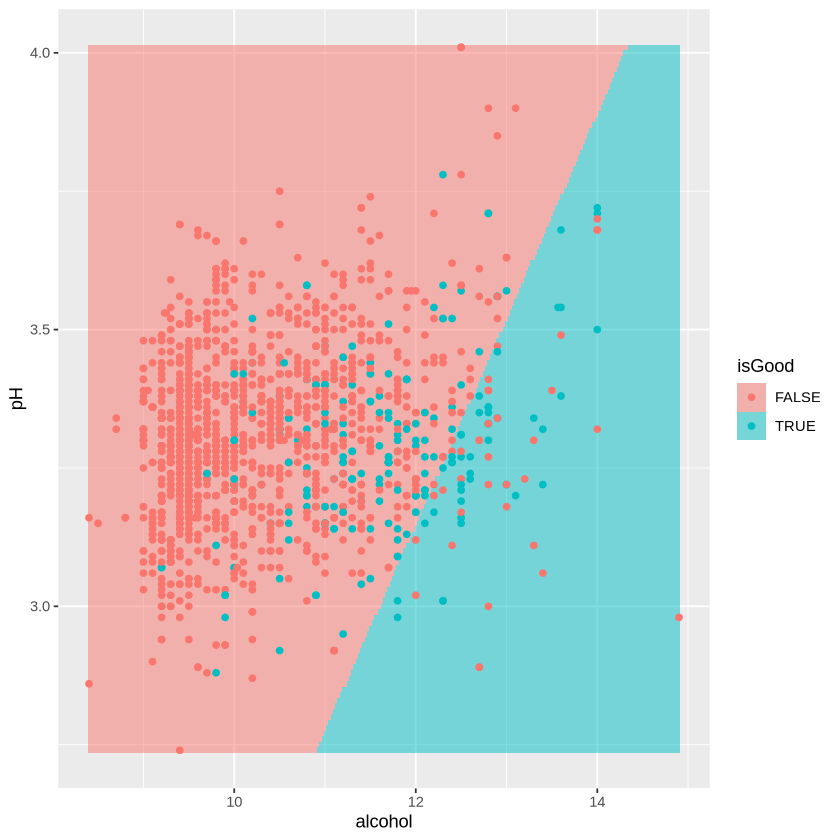

In [2]:
library(data.table)
library(caret)

dt <- fread("data/winequality-red.csv")

# binary Target Column isGood
dt[, isGood := as.factor(quality >= 7)]

# train "glm" model with isGood as target, Variables are alcohol + pH
# preprocess data with centering and scaling
# trainControl for cross validation
model <- train(isGood ~ alcohol + pH, data = dt, method = "glm", 
               preProcess = c("center", "scale"), 
               trControl = trainControl(method = "cv"))

# create new data
dt.all <- expand.grid(
    alcohol = seq(min(dt$alcohol), max(dt$alcohol), 0.025),
    pH = seq(min(dt$pH), max(dt$pH), 0.01)
)

# predict on new data
dt.all$isGood <- predict(model, newdata = dt.all)

# plot decision limit
g <- ggplot(mapping = aes(alcohol, pH)) + 
  geom_raster(data = dt.all, mapping = aes(fill = isGood), alpha = 0.5) +
  geom_point(data = dt, mapping = aes(color = isGood))
print(g)